Terry Boo Chee Yee, Li Sheng | P2211194, P2309110 | DAAA/FT/2B/22 | Deep Learning CA2 - Part A (GAN)

<h1><Center>Generative Adverserial Network</Center></h1>

# Overview

# Table of contents

- [1. Background](#1)
- [2. Set up](#2)

# Background <a id = '1'></a>

__Task__

We are working on a project to create 260 small black-and-white images

__What are GANs__

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

__Main components of GAN__

- Discriminator

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from the data created by the generator. It could use any network architecture appropriate to the type of data it's classifying.

- Generator

The generator part of a GAN learns to create fake data by incorporating feedback from the discriminator. It learns to make the discriminator classify its output as real.

__How Gan works__

First, the generator creates samples from random noise inputs and feeds these generated samples into the discriminator. The discriminator then tries to classify whether each sample is real (from the actual data distribution) or generated (fake).

__If you are asked to generate images of a specific class, propose a way of doing it__

__If you are asked to generate coloured images instead of black-and-white ones, do you think it would be easier or harder to produce better quality results__

__What class(es) is/are relatively easier/harder to generate? Why?__

__References__

https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/

https://developers.google.com/machine-learning/gan/gan_structure

# Set up <a id = '2'></a>

## Importing Libraries

In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import random
import os
import shutil
import tensorflow as tf
import math
from PIL import Image
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utility  Libraries
from sklearn.utils import resample
from tensorflow.keras.utils import Sequence
import tensorflow.keras.utils as image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory

# Pre-Processing Libraries
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

# Model Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

#Layers Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

#Callback Libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Evaluation Libraries
from sklearn.metrics import classification_report
from visualkeras import layered_view
from sklearn.metrics import confusion_matrix

# ignore warnings
import pickle
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('emnist-letters-train.csv', header=None)

# Exploratory Data Analysis (EDA) Loading and Visualising

Shape of data array: (99040, 785)


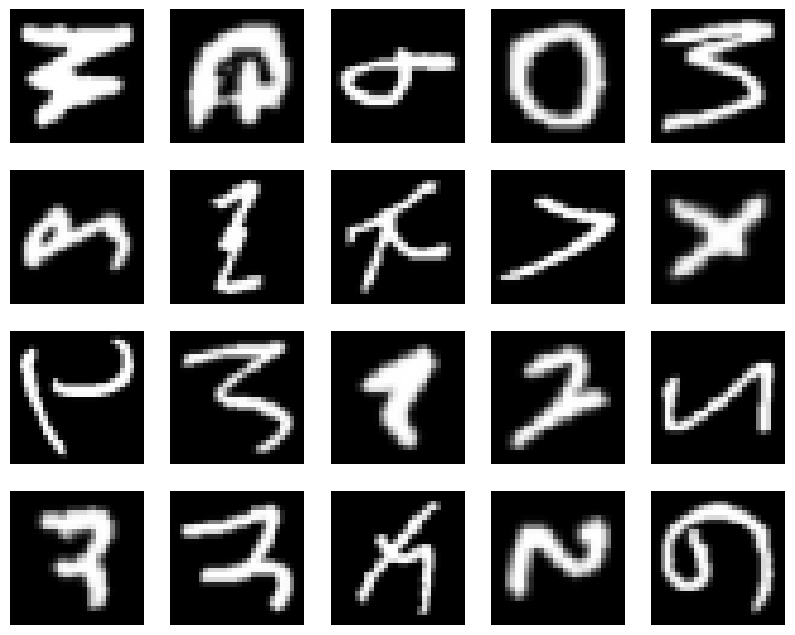

In [29]:
# Convert DataFrame to NumPy array
data = df.values

# Check the shape of the data
print("Shape of data array:", data.shape)

# Each image is 28x28 pixels
image_size = 28

# Extract pixel data and reshape each row into a 28x28 array
num_images = data.shape[0]
images = data[:, 1:].reshape(num_images, image_size, image_size).astype(np.uint8)  # Assuming pixel values are integers

# Normalize pixel values
images = images / 255.0


# Define a function to display multiple images
def plot_images(images, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')

# Display the first 20 images
num_display = 20
plot_images(images[:num_display], nrows=4, ncols=5)
plt.show()

Shape of data array: (99039, 785)
Labels: [ 7 16 15 23 17 13 11 22 24 10 14 18 21 26 21 21 24 19  5 -1]


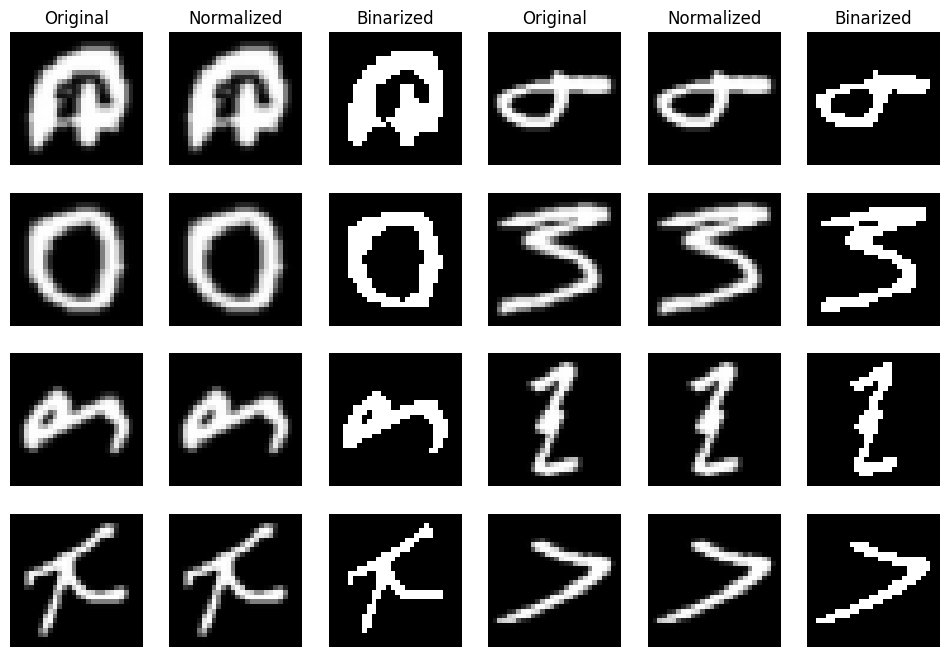

In [41]:
# Convert DataFrame to NumPy array
data = df.values

# Check the shape of the data
print("Shape of data array:", data.shape)  # Should be (99040, 785)

# Extract labels (first column)
labels = data[:, 0]
print("Labels:", labels[:20])  # Print first 20 labels for verification

# Assuming each image is 28x28 pixels and the remaining columns are pixel values
image_size = 28
num_images = data.shape[0]

# Extract pixel data and reshape each row into a 28x28 array
original_images = data[:, 1:].reshape(num_images, image_size, image_size).astype(np.uint8)

# Normalize pixel values
normalized_images = original_images / 255.0

# Binarize the images by applying a threshold
threshold = 0.5
binarized_images = (normalized_images > threshold).astype(np.uint8)

# Define a function to display multiple images before and after processing
def plot_images(original_images, normalized_images, binarized_images, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols*3, figsize=(ncols*6, nrows*2))
    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            if index < len(original_images):
                # Display original image
                ax_original = axes[i, j*3]
                ax_original.imshow(original_images[index], cmap='gray')
                ax_original.axis('off')
                if i == 0:
                    ax_original.set_title('Original')
                
                # Display normalized image
                ax_normalized = axes[i, j*3 + 1]
                ax_normalized.imshow(normalized_images[index], cmap='gray')
                ax_normalized.axis('off')
                if i == 0:
                    ax_normalized.set_title('Normalized')
                
                # Display binarized image
                ax_binarized = axes[i, j*3 + 2]
                ax_binarized.imshow(binarized_images[index], cmap='gray')
                ax_binarized.axis('off')
                if i == 0:
                    ax_binarized.set_title('Binarized')

# Display the first 10 images before and after processing
num_display = 8
plot_images(original_images[:num_display], normalized_images[:num_display], binarized_images[:num_display], nrows=4, ncols=2)
plt.show()
